# <center> Stromnetz Graz Smart Meter Analysis

In [1]:
# Imports for plot
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as md
import matplotlib.gridspec as gridspec
# Custom Modules
from SMIT.user import user
from SMIT.filehandling import OsInterface

## Setup

In [2]:
user_instance = user()                       # Create user from user_data file
OsInterface(user_instance).scrapandmove()    # Update data from stromnetzgraz website

# Create dataframes with all data
df_day = OsInterface(user_instance).create_dataframe(user_instance.Folder['work_daysum'], user_instance.Meter['day_meter'])
df_night = OsInterface(user_instance).create_dataframe(user_instance.Folder['work_daysum'], user_instance.Meter['night_meter'])

Firefox headless mode activated


AttributeError: 'user' object has no attribute 'rsa'

## Analysis

/tmp/ipykernel_46478/1900224827.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs[0, :2])


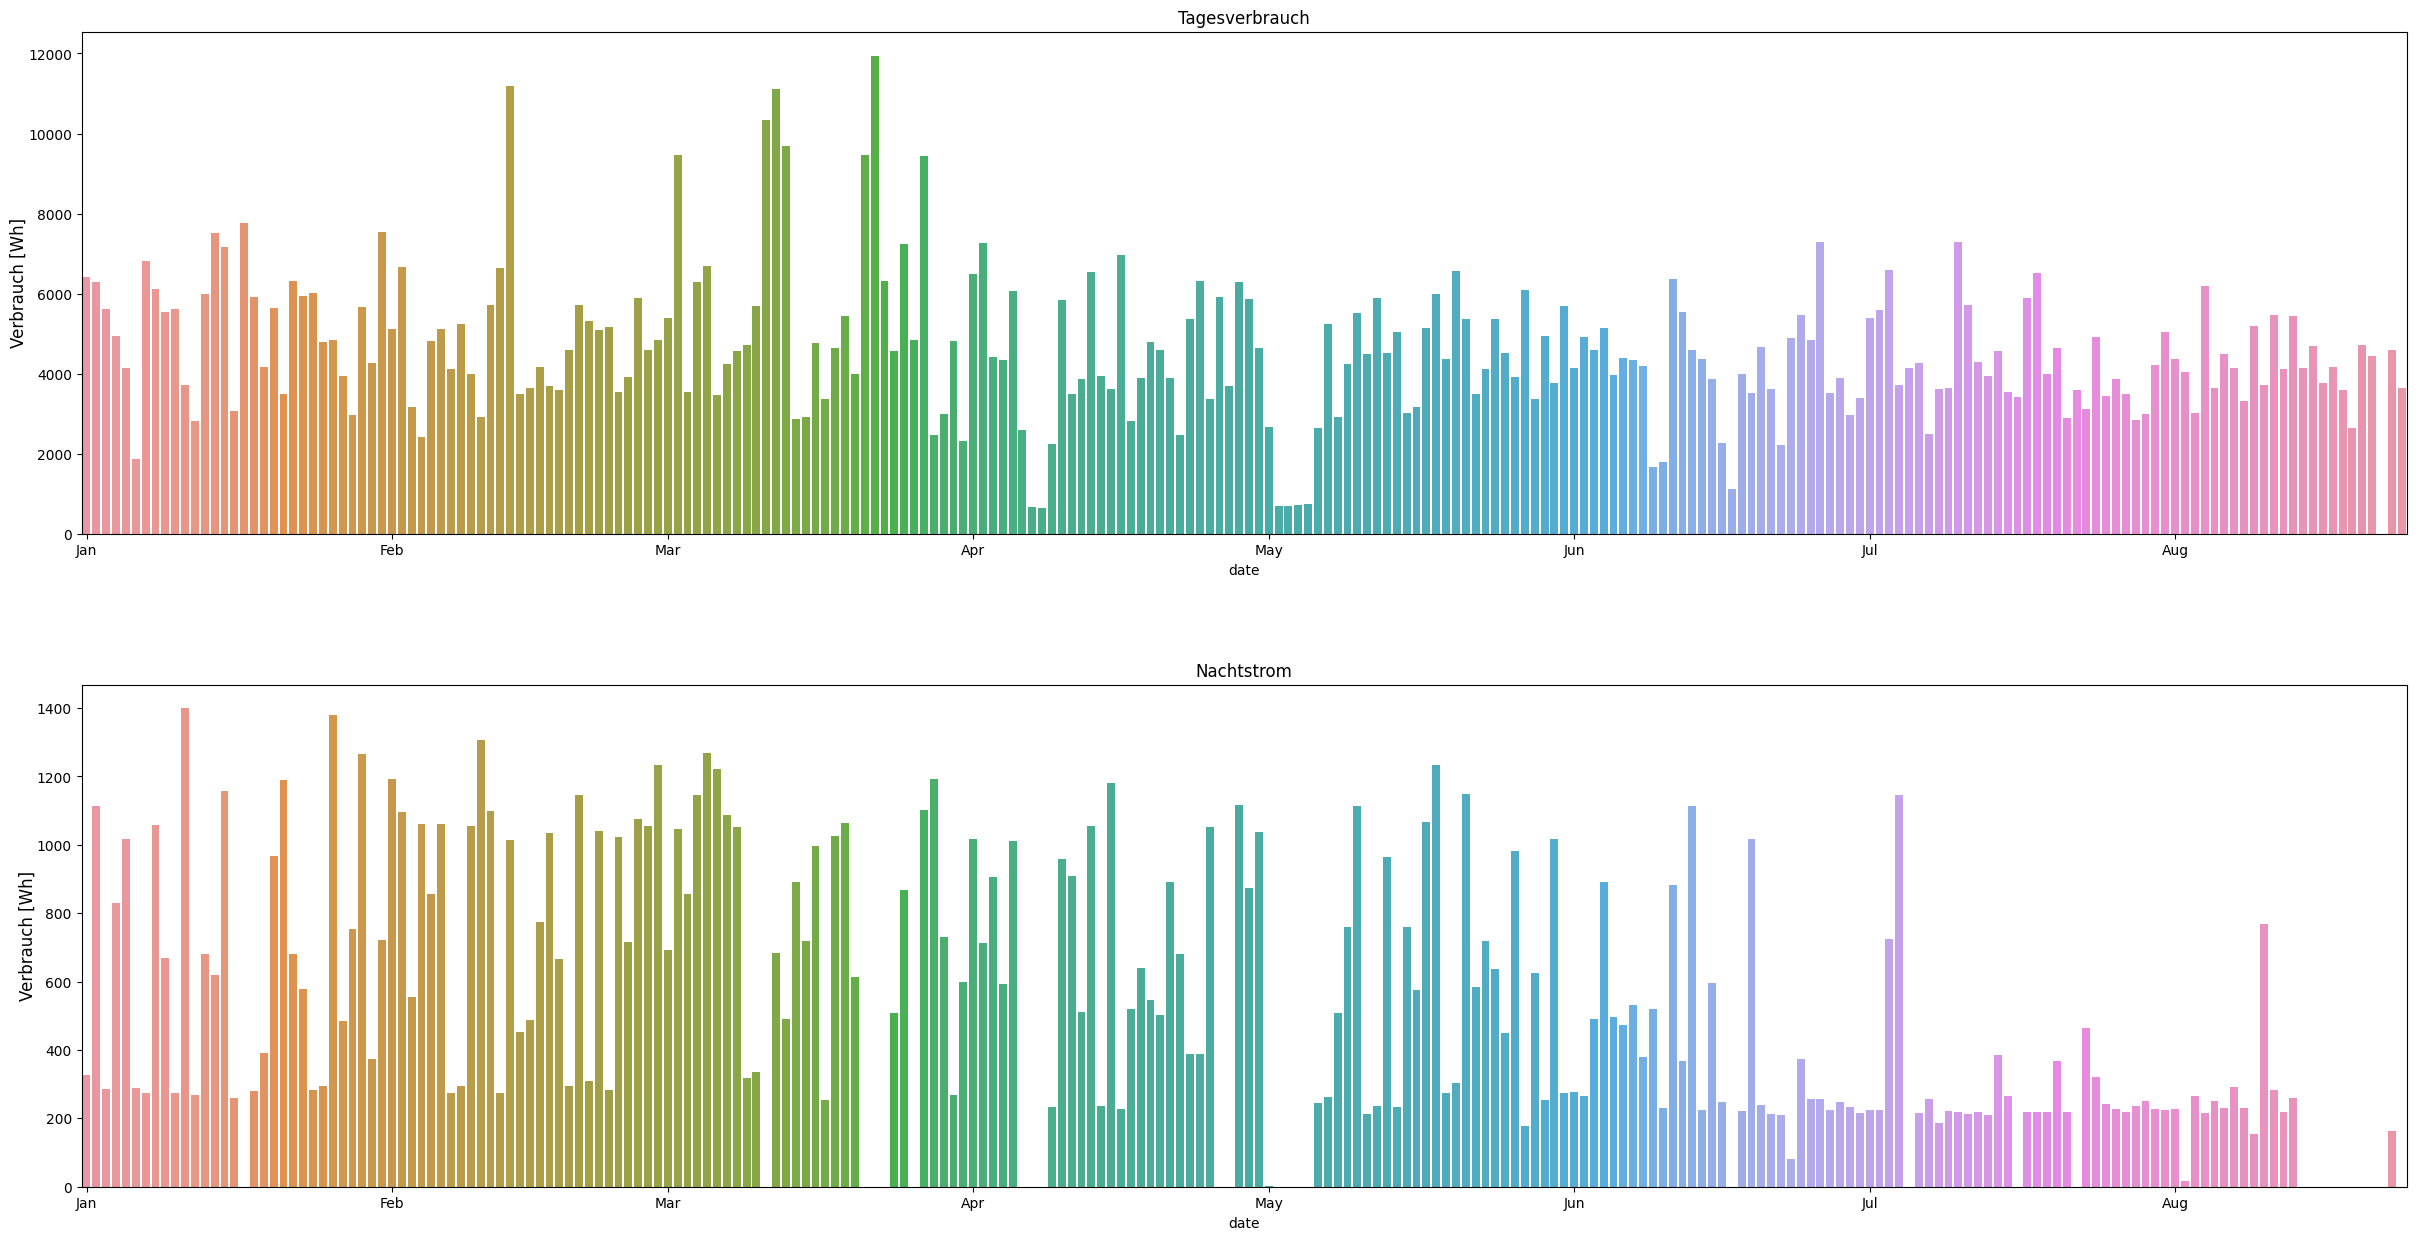

In [4]:
fig = plt.figure(figsize =([30, 15]))

# Gridspec Setup
gs = gridspec.GridSpec(2, 2)
ax = plt.subplot(gs[0, 0])
gs.update(wspace = 0.1, hspace = 0.3)

### AX1 ###
ax1 = plt.subplot(gs[0, :2])
sns.barplot(data=df_day,
            x='date',
            y='verbrauch')
ax1.set_ylabel('Verbrauch [Wh]', labelpad = 0, fontsize = 12)
ax1.xaxis.set_major_locator(md.MonthLocator())
ax1.xaxis.set_major_formatter(md.DateFormatter('%b'))
ax1.set_title('Tagesverbrauch')

### AX2 ###
ax2 = plt.subplot(gs[1, :2])
sns.barplot(data=df_night,
            x='date',
            y='verbrauch')
ax2.set_ylabel('Verbrauch [Wh]', labelpad = 0, fontsize = 12)
ax2.xaxis.set_major_locator(md.MonthLocator())
ax2.xaxis.set_major_formatter(md.DateFormatter('%b'))
ax2.set_title('Nachtstrom')

### Draw Plot ###
plt.show()